In [44]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
class Perceptron:
    
    def _init_(self):
        self.w=None
        self.b=None
        
    def model(self,x):
        return 1 if (np.dot(self.w,x)>=self.b) else 0
        
    def predict(self,X):
        Y=[]
        for x in X:
            result=self.model(x)
            Y.append(result)
        return np.array(Y)   
    
    def fit(self,X,Y,epochs=1,lr=1):
        self.w=np.ones(X.shape[1])
        self.b=0
        accuracy={}
        max_accuracy=0
        for i in range(epochs):
            for x,y in zip(X,Y):
                y_pred=self.model(x)
                if y==1 and y_pred==0:
                    self.w=self.w+lr*x
                    self.b=self.b+lr*1
                elif y==0 and y_pred==1:
                    self.w=self.w-lr*x
                    self.b=self.b-lr*1
            accuracy[i]=accuracy_score(self.predict(X),Y)
            if(accuracy[i]>max_accuracy):
                max_accuracy=accuracy[i]
                chkptw=self.w
                chkptb=self.b
        
        self.b=chkptb
        self.w=chkptw
        print("Max accuracy ",max_accuracy)
        #plt.plot(accuracy.values())
        #plt.show()

In [45]:
import sklearn.datasets
import numpy as np
breast_cancer=sklearn.datasets.load_breast_cancer()
import pandas as pd
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
data['class']=breast_cancer.target
from sklearn.model_selection import train_test_split
X=data.drop('class',axis=1)
Y=data['class']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(569, 30) (455, 30) (114, 30)
(569,) (455,) (114,)


In [46]:
perceptron=Perceptron()
X_train=X_train.values
X_test=X_test.values

In [55]:
perceptron.fit(X_train,Y_train,10000,0.0001)

Max accuracy  0.9340659340659341


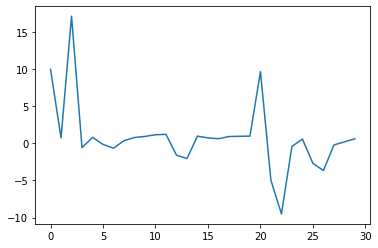

In [56]:

plt.plot(perceptron.w)
plt.show()

In [57]:

Y_pred_train=perceptron.predict(X_train)
accuracy=accuracy_score(Y_pred_train,Y_train)
print(accuracy)

0.9340659340659341


In [58]:
Y_pred_test=perceptron.predict(X_test)
accuracy=accuracy_score(Y_pred_test,Y_test)
print(accuracy)

0.9385964912280702
